# EDA U.A Secondary School
## By: UNNI KRISHNAN AMBADY (Sxxxx664B)

In [ ]:
print("EDA U.A Secondary School ")


EDA U.A Secondary School 


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

# After a couple of Iteration a function Read_n_Clean() is defined
#### This is to reduce overhead for the nect stage E2E pipline for prediction activity
## This function is to do the following activities
####1. Read the data file
####2. Remove bad records
####3. Compute sleep duration (which is think very relevent)
####4. Convert Text fields such as gender, bag colour to numerical entires
####5. retun a datafram named df

In [ ]:
#import sqlite3

# Assume the datafile is kept in ./data/ folder
# Given SQLite database file named score.db

# Define a function to calculate sleep duration based on the 24-hour clock


def Read_n_Clean():
    db_file = './data/score.db'
    try:
        # Create a connection to the SQLite database
        cnx = sqlite3.connect(db_file)
        df = pd.read_sql_query("SELECT * FROM score;", cnx)
        if cnx:
            cnx.close()
    except sqlite3.Error as e:
        print("SQLite error:", e)

    ##Start Cleaning the Data
    conditions = [
        # Remove rows with any missing values (NaN)
        df.isnull().any(axis=1),

        # Remove rows where 'direct_admission' is 'NO data entered'
        df['direct_admission'] == 'NO data entered',

        # Remove rows where 'final_test' is negative
        df['final_test'] < 0,

        # Add more conditions for other columns as needed
        ]

    # Combine the conditions using the logical OR operator to identify rows with invalid data
    invalid_data_mask = np.logical_or.reduce(conditions)

    # Create 'df_invalid' to store the removed invalid rows
    df_invalid = df[invalid_data_mask]

    # Filter the original DataFrame to keep only rows without invalid data
    df = df[~invalid_data_mask]
    # Now 'df' contains only rows without invalid data, and 'df_invalid' contains the removed invalid rows
    #From sleep_time and wake_uptine deduce the sleep_duration
    #Note: the sleep_time & wakeup_time are currentnly colon (:) seperated TEXT
    #I change into numbers (foat) then find the difference to compute the sleep_duration
    #I think sleep_deuration is a factor to be used

    df['tuition'].replace({'N': 'No', 'Y': 'Yes'}, inplace=True)#Noted this error at a later stage
    #  There is Negative age. I am Ignoring that colums
    df2 = df.copy()
    # Convert 'sleep_time' and 'wake_time' to numbers from Text
    df['sleep_time'] = df['sleep_time'].str.split(':').str[0].astype(int)+df['sleep_time'].str.split(':').str[1].astype(int)/60.0
    df['wake_time'] = df['wake_time'].str.split(':').str[0].astype(int)+df['wake_time'].str.split(':').str[1].astype(int)/60.0

    #print(df['sleep_time'][0],df2['wake_time'][0] )
    #create an inner function
    def calculate_sleep_duration(row):
        if row['sleep_time'] >= 12:
            s1 = 24 - row['sleep_time']
            return s1 + row['wake_time']
        else:
            return row['wake_time'] - row['sleep_time']
   # Apply the function to create the 'sleep_duration' column in 'df2'
    df['sleep_duration'] = df.apply(calculate_sleep_duration, axis=1)

    # Display the updated 'df' DataFrame
    #df.head()

    #Desciptive coulums are converted to numeric
    df['direct_admission'].replace({ 'No': 1,'Yes': 2}, inplace=True)
    df['CCA'].replace({'None' : 0,'Arts': 1,  'Clubs': 2, 'Sports': 3 }, inplace=True)
    df['learning_style'].replace({'Auditory': 1,'Visual': 2 }, inplace=True)
    df['gender'].replace({'Female': 1,'Male': 2 }, inplace=True)
    df['tuition'].replace({'No': 0,'Yes': 1 }, inplace=True)
    df['bag_color'].replace({'black': 1,'blue': 2, 'green':3,'red':4,'white':5,'yellow':6  }, inplace=True)
    df['mode_of_transport'].replace({'walk': 1,'public transport': 2,  'private transport': 3}, inplace=True)


    #return the Dataframe
    return(df)

In [ ]:
df = Read_n_Clean()
#df.head()


In [ ]:
df.head()


,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,sleep_duration
0,0,0,2,3,2,ACN2BE,1,0,69.0,14.0,2.0,16.0,10.0,91.0,22.0,6.0,3,6,8.0
1,1,2,1,3,1,FGXIIZ,1,0,47.0,4.0,19.0,16.0,7.0,94.0,22.5,6.5,3,3,8.0
2,2,0,2,0,2,B9AI9F,2,0,85.0,14.0,2.0,15.0,8.0,92.0,22.5,6.5,3,5,8.0
4,4,0,1,3,1,AXZN2E,2,0,66.0,24.0,3.0,16.0,7.0,95.0,21.5,5.5,2,6,8.0
5,5,0,1,1,2,BA6R14,1,0,57.0,9.0,12.0,15.0,11.0,96.0,22.5,6.5,3,4,8.0


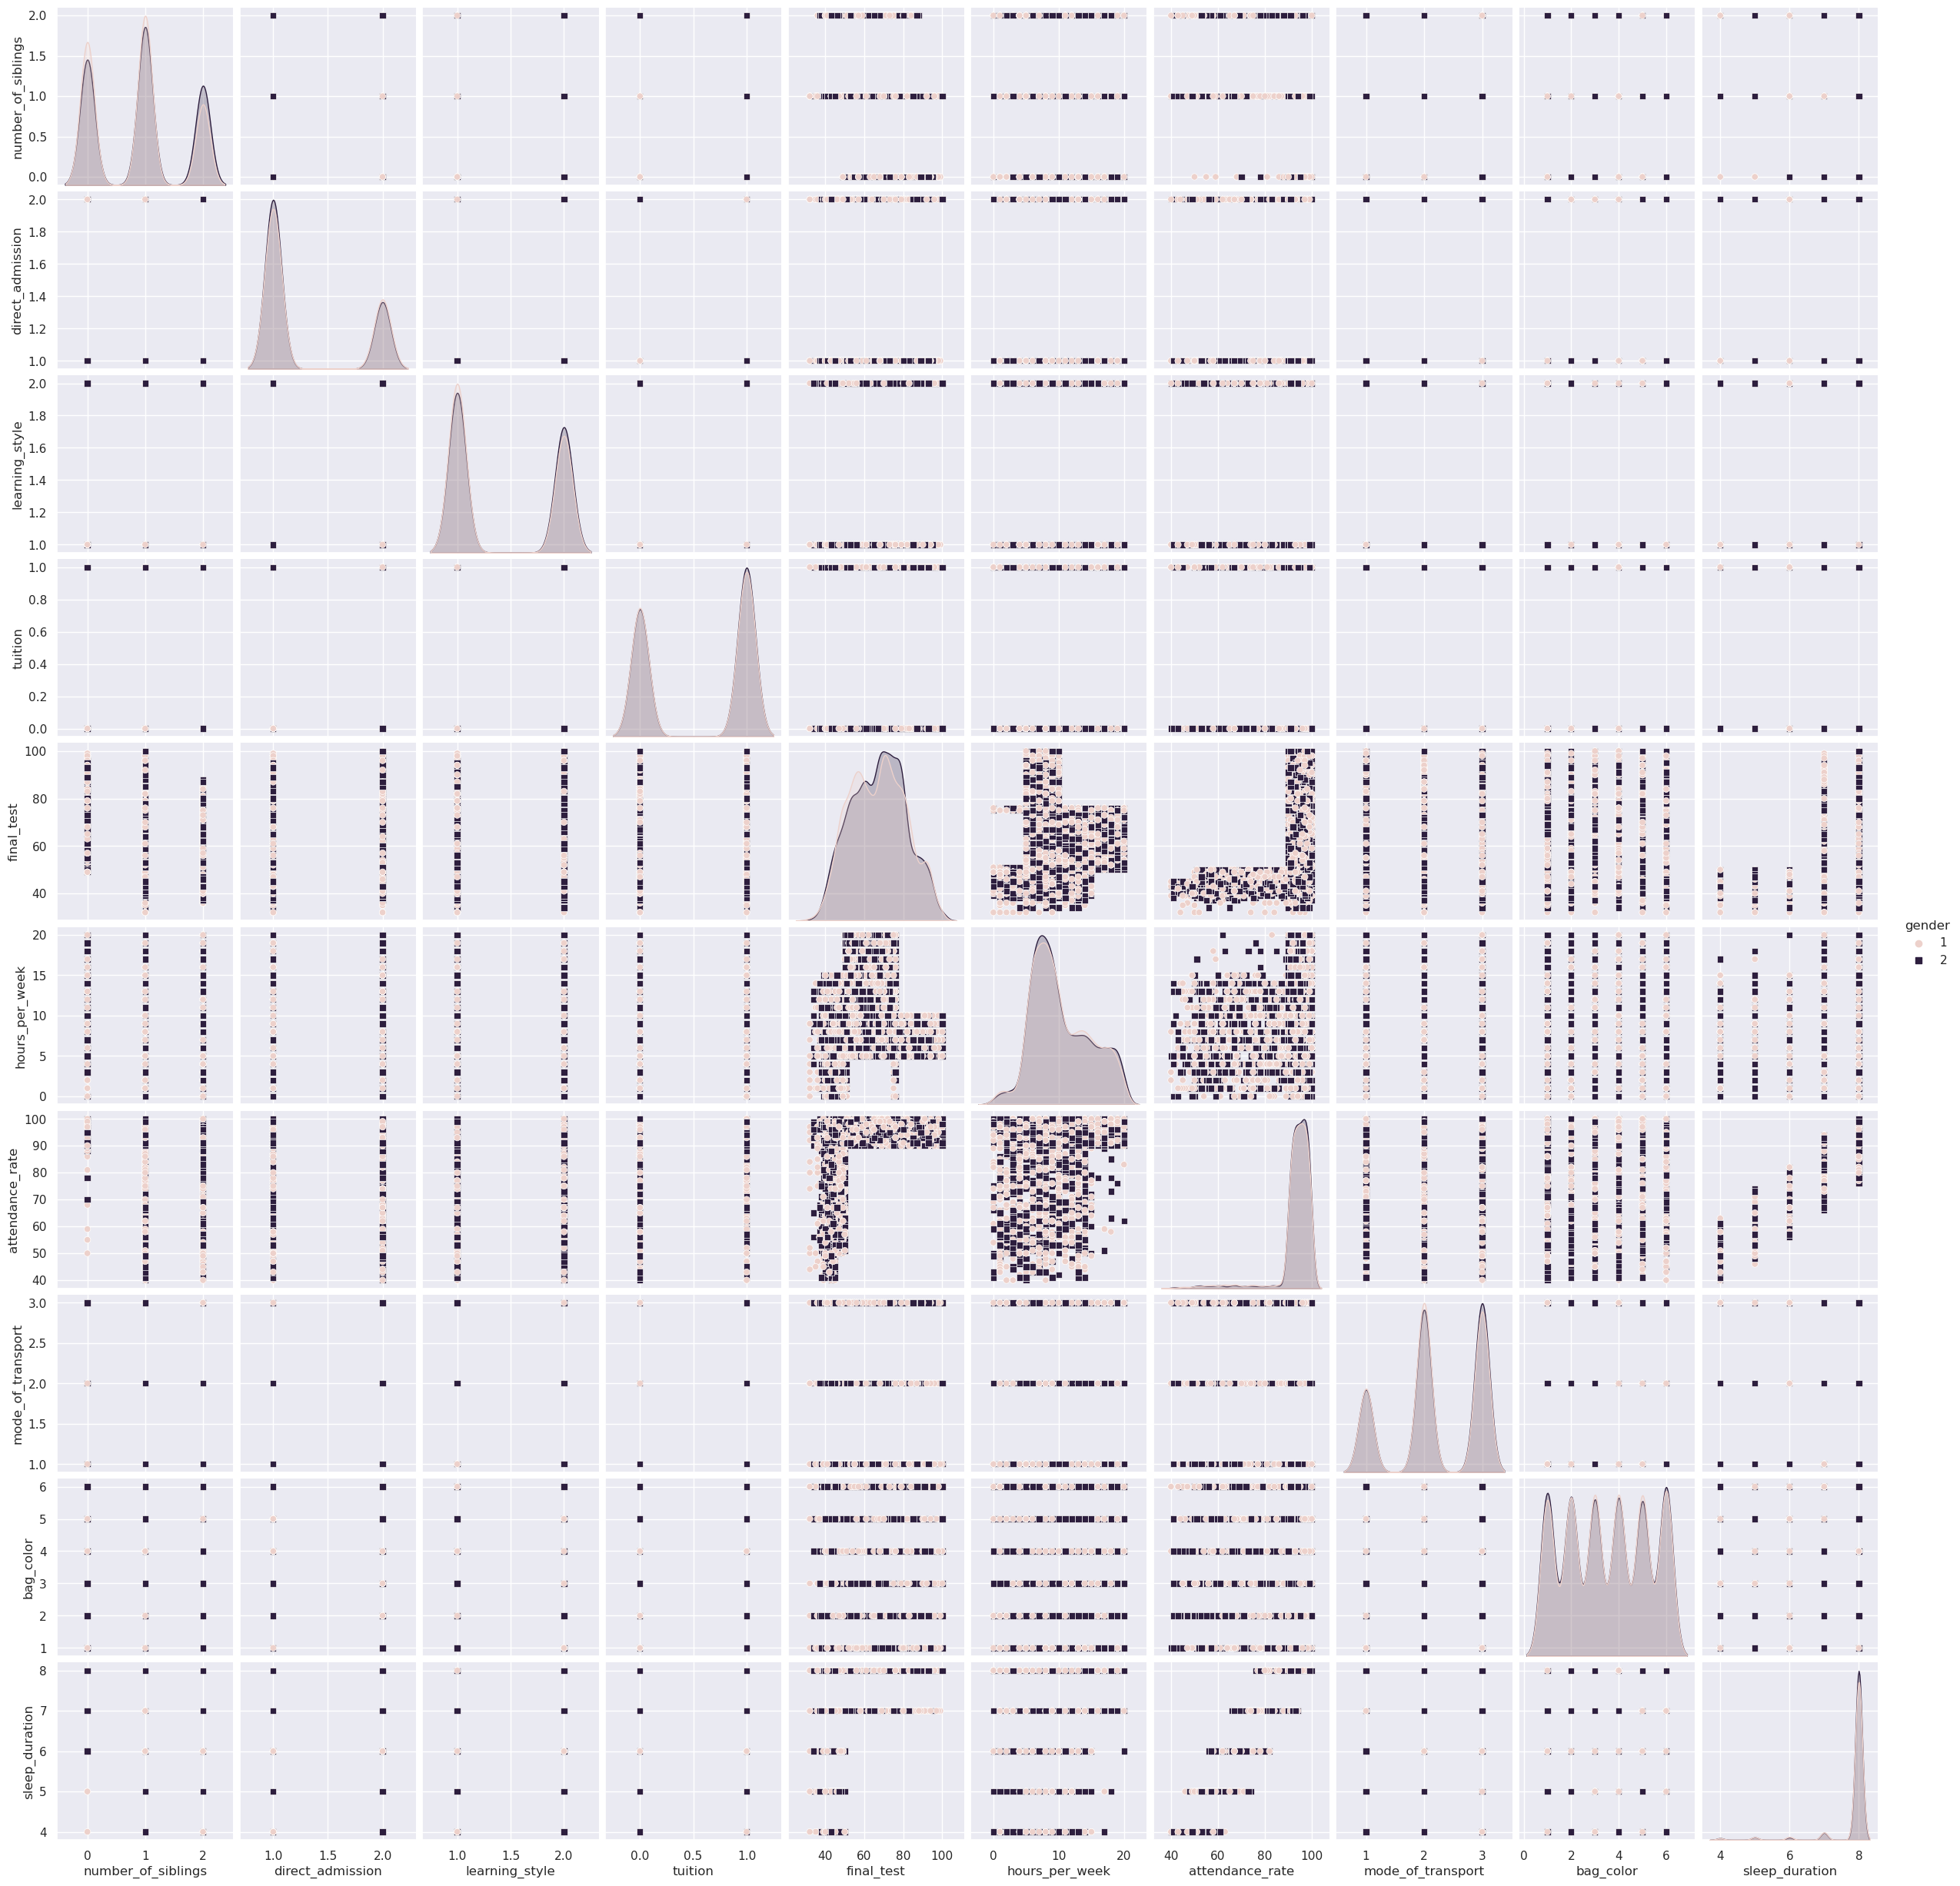

In [ ]:
## Correlation plots SET-1

# Select the columns of relevence from  DataFrame
columns_of_interest = ['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
                       'gender', 'tuition', 'final_test',  'hours_per_week',
                       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_duration']
data_of_interest = df[columns_of_interest]

# Create a pairplot to visualize pairwise relationships
sns.pairplot(data_of_interest, diag_kind='kde', hue='gender', markers=['o', 's'])

# Create a correlation matrix
#correlation_matrix = data_of_interest.corr()
# Create a correlation heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Show the plots
plt.show()


In [ ]:
#Correlation Set-2
"""
# Select the columns of interest from your DataFrame
columns_of_interest = ['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
                       'gender', 'tuition',  'hours_per_week',
                       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_duration']

# Create a DataFrame containing only the columns of interest
subset_df = df[columns_of_interest]

# Create pair plots
sns.pairplot(subset_df, x_vars=columns_of_interest[:-1], y_vars= ['final_test'], diag_kind='kde')

# Set plot titles and labels
plt.suptitle('Pair Plots of Final Test vs. Other Variables', y=1.02)
plt.show()
"""

In [ ]:
# Select the columns of interest from  DataFrame
"""
columns_of_interest = ['number_of_siblings', 'direct_admission', 'CCA', 'learning_style', 'student_id',
                       'gender', 'tuition', 'final_test',  'hours_per_week',
                       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_duration']

data_of_interest = df[columns_of_interest]

# Create a correlation matrix
correlation_matrix = data_of_interest.corr()

# Create a correlation heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
heatmap_title = 'Correlation Heatmap Among ALL Important Variables'

plt.title(heatmap_title)

# Show the heatmap
plt.show()
"""

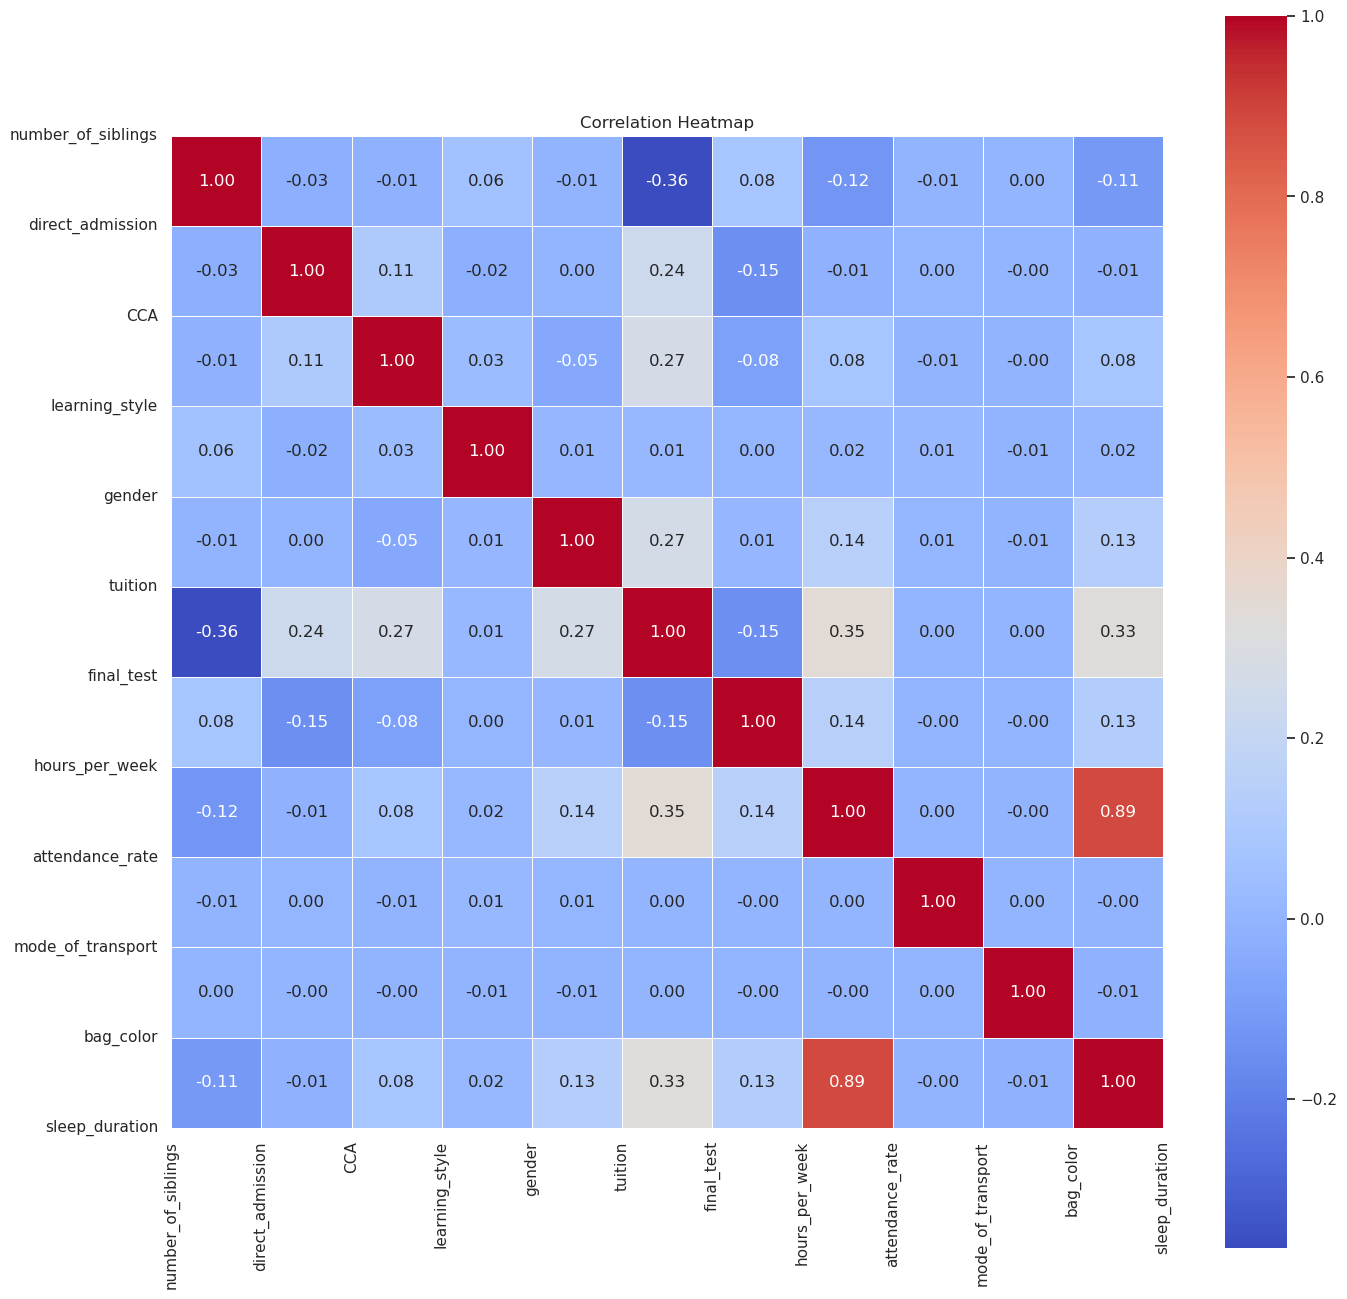

In [ ]:
#Heatmap Improved Code
# Select the columns of interest from your DataFrame

columns_of_interest = ['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
                       'gender', 'tuition', 'final_test',  'hours_per_week',
                       'attendance_rate', 'mode_of_transport', 'bag_color', 'sleep_duration']

# Create a DataFrame containing only the columns of interest
subset_df = df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Create a grid of correlation plots for all combinations
plt.figure(figsize=(16, 16))
sns.set(font_scale=1.0)  # Adjust the font size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)

# Add column names as labels
plt.xticks(range(len(columns_of_interest)), columns_of_interest, rotation=90)
plt.yticks(range(len(columns_of_interest)), columns_of_interest, rotation=0)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
subset_df.head()


,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_duration
0,0,2,3,2,1,0,69.0,16.0,10.0,91.0,3,6,8.0
1,2,1,3,1,1,0,47.0,16.0,7.0,94.0,3,3,8.0
2,0,2,0,2,2,0,85.0,15.0,8.0,92.0,3,5,8.0
4,0,1,3,1,2,0,66.0,16.0,7.0,95.0,2,6,8.0
5,0,1,1,2,1,0,57.0,15.0,11.0,96.0,3,4,8.0


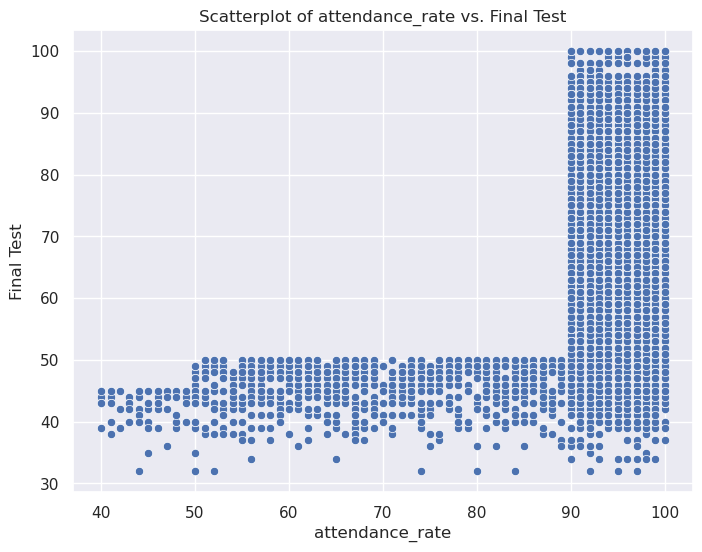

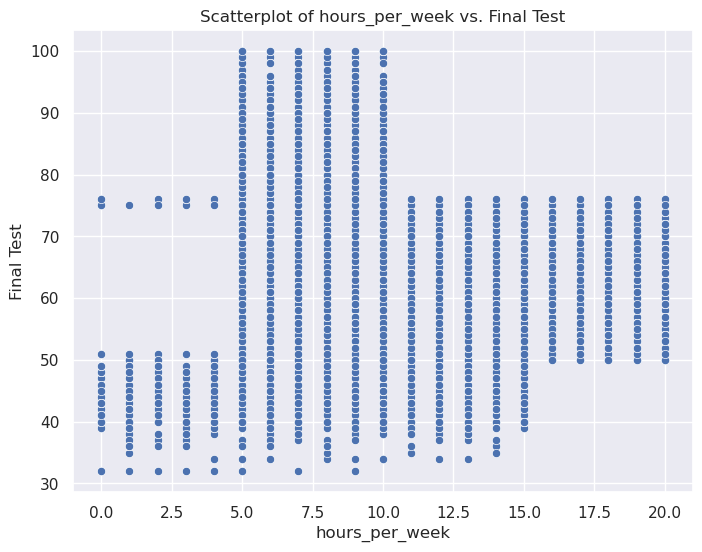

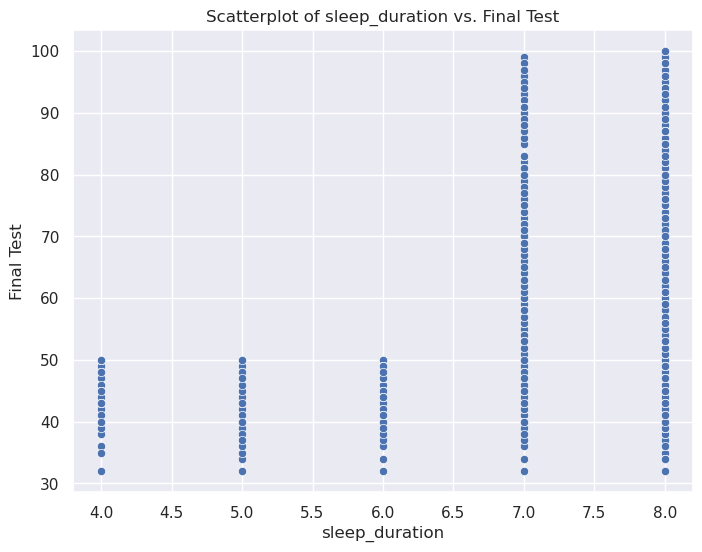

In [ ]:
"""x_columns = ['number_of_siblings', 'direct_admission',  'learning_style',
              'gender', 'tuition',  'hours_per_week', 'attendance_rate',
              'mode_of_transport', 'bag_color', 'sleep_duration']"""
x_columns = ['attendance_rate',
               'hours_per_week',
               'sleep_duration' ]

# Create separate scatterplots for each x-column vs. 'final_test'
for x_column in x_columns:
    plt.figure(figsize=(8, 6))  #  figure size yet to be adjusted
    sns.scatterplot(x=x_column, y='final_test', data=df)
    plt.title(f'Scatterplot of {x_column} vs. Final Test')
    plt.xlabel(x_column)
    plt.ylabel('Final Test')
    plt.show()

In [ ]:
# Help to be rendered to

#From the above 4 graphs which was narroed drom from th clues from the heatmap
#the key 3 highlights for early detection of student performance
#based on Attendance,hours_per_week  and sleep duration

# The 3 key findings are:
##1. Students with Attendance <90%
##2. Student Loading optimum is 5 to 10 (do not overload or engage lesser)
##3. Ensure students gets 7 to 8Hrs of sleep at night